# 환경구성

In [ ]:
# 폰트 설치
!apt-get update -qq # 나눔고딕 설치
!apt-get install fonts-nanum* -qq

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()
# 여기까지 실행 후 "런타임 다시 시작..." 실행 (이 부분은 실행할 필요 없음)

In [ ]:
# 한국어 형태소 분석 라이브러리
!pip install konlpy

In [ ]:
# 토픽모형 분석을 위한 라이브러리
!pip install gensim

# 1.문서 수치화 : 카운트 기반의 단어 표현(Count based word Representation)

## 가.One-Hot Encoding

In [ ]:
# one hot encoding text
docs = '''나는 매우 매우 나는 매우 좋은 선생님 입니다
당신은 매우 좋은 학생 학생 학생 입니다
당신은 매우 좋은 학생 학생 입니다'''

In [ ]:
tokens = docs.split()
print(tokens)

['나는', '매우', '매우', '나는', '매우', '좋은', '선생님', '입니다', '당신은', '매우', '좋은', '학생', '학생', '학생', '입니다', '당신은', '매우', '좋은', '학생', '학생', '입니다']


In [ ]:
words = list(dict.fromkeys(tokens))
words

['나는', '매우', '좋은', '선생님', '입니다', '당신은', '학생']

In [ ]:
# 각 단어에 고유한 번호 부여한 dictionary 생성
word_to_id = {'[PAD]': 0, '[UNK]': 1}  # [PAD]: 길이 맞추는 용도, [UNK]: 알 수 없는 token
for word in words:
    word_to_id[word] = len(word_to_id)

print(word_to_id)

{'[PAD]': 0, '[UNK]': 1, '나는': 2, '매우': 3, '좋은': 4, '선생님': 5, '입니다': 6, '당신은': 7, '학생': 8}


In [ ]:
# 고유한 번호로 부터 단어를 찾을 수 있는 dictionary 생성
id_to_word = {_id:word for word, _id in word_to_id.items()}
print(id_to_word)

{0: '[PAD]', 1: '[UNK]', 2: '나는', 3: '매우', 4: '좋은', 5: '선생님', 6: '입니다', 7: '당신은', 8: '학생'}


In [ ]:
# 줄바꿈 단위로 문장 분리
sentences = docs.split("\n")
sentences

['나는 매우 매우 나는 매우 좋은 선생님 입니다', '당신은 매우 좋은 학생 학생 학생 입니다', '당신은 매우 좋은 학생 학생 입니다']

In [ ]:
# 띄어쓰기 단위로 단어 분리
tokens = []
for sentence in sentences:
    tokens.append(sentence.split())
tokens

[['나는', '매우', '매우', '나는', '매우', '좋은', '선생님', '입니다'],
 ['당신은', '매우', '좋은', '학생', '학생', '학생', '입니다'],
 ['당신은', '매우', '좋은', '학생', '학생', '입니다']]

In [ ]:
# tokens을 vocabulary의 고유 번호로 변경
token_ids = []
for line_token in tokens:
    token_ids.append([word_to_id[token] for token in line_token])
token_ids

[[2, 3, 3, 2, 3, 4, 5, 6], [7, 3, 4, 8, 8, 8, 6], [7, 3, 4, 8, 8, 6]]

In [ ]:
# one hot encoding
one_hot_encodings = []
for line_token in token_ids:
    print(line_token)
    one_hot_line = []  # 한 줄을 표현하는 벡터
    for id in line_token:
        # print(id)
        one_hot = [0] * len(word_to_id)  # 모두 0인 벡터를 만듬
        # print(one_hot)
        one_hot[id] = 1  # 단어 id만 1로 변경
        print(id, one_hot)
        one_hot_line.append(one_hot)  # 단어를 라인에 추가
    print(one_hot_line)
    one_hot_encodings.append(one_hot_line)  # 라인을 전체 문서에 추가

[2, 3, 3, 2, 3, 4, 5, 6]
2 [0, 0, 1, 0, 0, 0, 0, 0, 0]
3 [0, 0, 0, 1, 0, 0, 0, 0, 0]
3 [0, 0, 0, 1, 0, 0, 0, 0, 0]
2 [0, 0, 1, 0, 0, 0, 0, 0, 0]
3 [0, 0, 0, 1, 0, 0, 0, 0, 0]
4 [0, 0, 0, 0, 1, 0, 0, 0, 0]
5 [0, 0, 0, 0, 0, 1, 0, 0, 0]
6 [0, 0, 0, 0, 0, 0, 1, 0, 0]
[[0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0]]
[7, 3, 4, 8, 8, 8, 6]
7 [0, 0, 0, 0, 0, 0, 0, 1, 0]
3 [0, 0, 0, 1, 0, 0, 0, 0, 0]
4 [0, 0, 0, 0, 1, 0, 0, 0, 0]
8 [0, 0, 0, 0, 0, 0, 0, 0, 1]
8 [0, 0, 0, 0, 0, 0, 0, 0, 1]
8 [0, 0, 0, 0, 0, 0, 0, 0, 1]
6 [0, 0, 0, 0, 0, 0, 1, 0, 0]
[[0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 1, 0, 0]]
[7, 3, 4, 8, 8, 6]
7 [0, 0, 0, 0, 0, 0, 0, 1, 0]
3 [0, 0, 0, 1, 0,

In [ ]:
one_hot_encodings

[[[0, 0, 1, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 1, 0, 0, 0, 0, 0],
  [0, 0, 0, 1, 0, 0, 0, 0, 0],
  [0, 0, 1, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 1, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 1, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 1, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 1, 0, 0]],
 [[0, 0, 0, 0, 0, 0, 0, 1, 0],
  [0, 0, 0, 1, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 1, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 1],
  [0, 0, 0, 0, 0, 0, 0, 0, 1],
  [0, 0, 0, 0, 0, 0, 0, 0, 1],
  [0, 0, 0, 0, 0, 0, 1, 0, 0]],
 [[0, 0, 0, 0, 0, 0, 0, 1, 0],
  [0, 0, 0, 1, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 1, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 1],
  [0, 0, 0, 0, 0, 0, 0, 0, 1],
  [0, 0, 0, 0, 0, 0, 1, 0, 0]]]

In [ ]:
import numpy as np
np.argmax(np.array(one_hot_encodings[2]), axis=-1)

array([7, 3, 4, 8, 8, 6])

In [ ]:
token_ids[2]
for token in token_ids[2]:
  print(id_to_word[token])

당신은
매우
좋은
학생
학생
입니다


In [ ]:
import tensorflow as tf
# tensorflow one hot
# token_ids가 길이가 달라서 오류 발생
# depth는 vocabulary 크기

# tf_one_hot_encodings = tf.one_hot(indices=token_ids, depth=len(word_to_id))
# tf_one_hot_encodings

In [ ]:
id_to_word

{0: '[PAD]',
 1: '[UNK]',
 2: '나는',
 3: '매우',
 4: '좋은',
 5: '선생님',
 6: '입니다',
 7: '당신은',
 8: '학생'}

In [ ]:
# token_ids가 앞 1개만 one_hot으로 변경
tf_one_hot_encodings = tf.one_hot(indices=token_ids[2], depth=len(word_to_id))
tf_one_hot_encodings

<tf.Tensor: shape=(6, 9), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)>

In [ ]:
# 모두 길이가 5가 되도록 pad(0) 추가
pad_ids = []
for line in token_ids:
    line = line[:8]
    line += [0] * (8 - len(line))
    pad_ids.append(line)
pad_ids

[[2, 3, 3, 2, 3, 4, 5, 6], [7, 3, 4, 8, 8, 8, 6, 0], [7, 3, 4, 8, 8, 6, 0, 0]]

In [ ]:
tf_one_hot_encodings = tf.one_hot(indices=pad_ids, depth=len(word_to_id))
tf_one_hot_encodings

<tf.Tensor: shape=(3, 8, 9), dtype=float32, numpy=
array([[[0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 

## 나.Bag of Words

* 모든 단어를 포함하는 vocab을 만들어서 각 단어에 인텍스를 부여
* vocab의 인텍스 위치에 그단어의 등장횟수를 기록

#### 1)말뭉치 사전 만들기

In [ ]:
# 토큰으로 분리
tokens = docs.split()
words = list(dict.fromkeys(tokens))
words

['나는', '매우', '좋은', '선생님', '입니다', '당신은', '학생']

In [ ]:
# 각 단어에 고유한 번호 부여한 dictionary 생성
word_to_id = {}
for word in words:
    word_to_id[word] = len(word_to_id)
word_to_id

{'나는': 0, '당신은': 5, '매우': 1, '선생님': 3, '입니다': 4, '좋은': 2, '학생': 6}

In [ ]:
word_to_id.values()


dict_values([0, 1, 2, 3, 4, 5, 6])

In [ ]:
# 고유한 번호로 부터 단어를 찾을 수 있는 dictionary 생성
id2word = {_id:word for word, _id in word_to_id.items()}
id2word

{0: '나는', 1: '매우', 2: '좋은', 3: '선생님', 4: '입니다', 5: '당신은', 6: '학생'}

In [ ]:
# 말뭉치 사전 : id2word, 말뭉치 단어기준 index :word_to_id
id2word

{0: '나는', 1: '매우', 2: '좋은', 3: '선생님', 4: '입니다', 5: '당신은', 6: '학생'}

#### 2) BOW 생성

말뭉치 사전의 토큰 인덱스 위치에 토큰 출현 회수 누적

In [ ]:
# 줄바꿈 단위로 문장 분리
sentences = docs.split("\n")
# 띄어쓰기 단위로 단어 분리
tokens = []
for sentence in sentences:
    tokens.append(sentence.split())
tokens

[['나는', '매우', '매우', '나는', '매우', '좋은', '선생님', '입니다'],
 ['당신은', '매우', '좋은', '학생', '학생', '학생', '입니다'],
 ['당신은', '매우', '좋은', '학생', '학생', '입니다']]

In [ ]:
# 말뭉치사전에서 토큰 기준 id를 생성
token_to_id = {t:_id for _id, t in id2word.items()}
print(token_to_id)

{'나는': 0, '매우': 1, '좋은': 2, '선생님': 3, '입니다': 4, '당신은': 5, '학생': 6}


In [ ]:
# tokens을 말뭉치사전의 고유 번호로 변경
token_ids = []
for line in tokens:
    token_ids.append([token_to_id[token] for token in line])
token_ids

[[0, 1, 1, 0, 1, 2, 3, 4], [5, 1, 2, 6, 6, 6, 4], [5, 1, 2, 6, 6, 4]]

#  2.문서 단어 행렬과 유사도 평가

## 가.문서 단어 행렬(Document-Term Matrix, DTM)

DTM 문서에서 등장한 단어의 빈도를 행렬의 값으로 표기하여 문서들의 특징을 서로 비교할 수 있도록 수치화

* 희소 표현(Sparse representation) : one-hot으로 표현
* 단어의 빈도수로 표현

In [ ]:
# one hot encoding
one_hot_encodings = []
for line_token in token_ids:
    print(line_token)
    one_hot_line = []  # 한 줄을 표현하는 벡터
    for id in line_token:
        one_hot = [0] * len(id2word)  # 모두 0인 벡터를 만듬
        one_hot[id] = 1  # 단어 id만 1로 변경
        print(id, one_hot)
        one_hot_line.append(one_hot)  # 단어를 라인에 추가
    one_hot_encodings.append((one_hot_line))  # 라인을 전체 문서에 추가

[0, 1, 1, 0, 1, 2, 3, 4]
0 [1, 0, 0, 0, 0, 0, 0]
1 [0, 1, 0, 0, 0, 0, 0]
1 [0, 1, 0, 0, 0, 0, 0]
0 [1, 0, 0, 0, 0, 0, 0]
1 [0, 1, 0, 0, 0, 0, 0]
2 [0, 0, 1, 0, 0, 0, 0]
3 [0, 0, 0, 1, 0, 0, 0]
4 [0, 0, 0, 0, 1, 0, 0]
[5, 1, 2, 6, 6, 6, 4]
5 [0, 0, 0, 0, 0, 1, 0]
1 [0, 1, 0, 0, 0, 0, 0]
2 [0, 0, 1, 0, 0, 0, 0]
6 [0, 0, 0, 0, 0, 0, 1]
6 [0, 0, 0, 0, 0, 0, 1]
6 [0, 0, 0, 0, 0, 0, 1]
4 [0, 0, 0, 0, 1, 0, 0]
[5, 1, 2, 6, 6, 4]
5 [0, 0, 0, 0, 0, 1, 0]
1 [0, 1, 0, 0, 0, 0, 0]
2 [0, 0, 1, 0, 0, 0, 0]
6 [0, 0, 0, 0, 0, 0, 1]
6 [0, 0, 0, 0, 0, 0, 1]
4 [0, 0, 0, 0, 1, 0, 0]


In [ ]:
# 말뭉치사전(id2word)의 인텍스를 기준으로 bow 생성
bows = []
for line in tokens:
    print(line)
    bow = [0] * len(id2word)
    print(bow)
    for t in line:
        # print(t)
        bow[token_to_id[t]] += 1
        print(t, bow)
    print()
    bows.append(bow)
bows = np.array(bows)
bows

['나는', '매우', '매우', '나는', '매우', '좋은', '선생님', '입니다']
[0, 0, 0, 0, 0, 0, 0]
나는 [1, 0, 0, 0, 0, 0, 0]
매우 [1, 1, 0, 0, 0, 0, 0]
매우 [1, 2, 0, 0, 0, 0, 0]
나는 [2, 2, 0, 0, 0, 0, 0]
매우 [2, 3, 0, 0, 0, 0, 0]
좋은 [2, 3, 1, 0, 0, 0, 0]
선생님 [2, 3, 1, 1, 0, 0, 0]
입니다 [2, 3, 1, 1, 1, 0, 0]

['당신은', '매우', '좋은', '학생', '학생', '학생', '입니다']
[0, 0, 0, 0, 0, 0, 0]
당신은 [0, 0, 0, 0, 0, 1, 0]
매우 [0, 1, 0, 0, 0, 1, 0]
좋은 [0, 1, 1, 0, 0, 1, 0]
학생 [0, 1, 1, 0, 0, 1, 1]
학생 [0, 1, 1, 0, 0, 1, 2]
학생 [0, 1, 1, 0, 0, 1, 3]
입니다 [0, 1, 1, 0, 1, 1, 3]

['당신은', '매우', '좋은', '학생', '학생', '입니다']
[0, 0, 0, 0, 0, 0, 0]
당신은 [0, 0, 0, 0, 0, 1, 0]
매우 [0, 1, 0, 0, 0, 1, 0]
좋은 [0, 1, 1, 0, 0, 1, 0]
학생 [0, 1, 1, 0, 0, 1, 1]
학생 [0, 1, 1, 0, 0, 1, 2]
입니다 [0, 1, 1, 0, 1, 1, 2]



array([[2, 3, 1, 1, 1, 0, 0],
       [0, 1, 1, 0, 1, 1, 3],
       [0, 1, 1, 0, 1, 1, 2]])

In [ ]:
print(list(id2word.values()),'\n')
np.sum(bows, axis=0)

['나는', '매우', '좋은', '선생님', '입니다', '당신은', '학생'] 



array([2, 5, 3, 1, 3, 2, 5])

In [ ]:
# 행 내에서 1차 오름차순으로, 2차 내림차순으로 뒤집기로 말뭉치 id  구하기 
tf = bows
tf_order = np.argsort(tf, axis=-1)
# 순서뒤집기
tf_order = np.flip(tf_order, axis=-1)
tf_order

array([[1, 0, 4, 3, 2, 6, 5],
       [6, 5, 4, 2, 1, 3, 0],
       [6, 5, 4, 2, 1, 3, 0]])

In [ ]:
for i, line in enumerate(tf_order):
    print(line)
    str_order = [id2word[_id] for _id in line if 0 < tf[i][_id]]
    print(str_order)

[1 0 4 3 2 6 5]
['매우', '나는', '입니다', '선생님', '좋은']
[6 5 4 2 1 3 0]
['학생', '당신은', '입니다', '좋은', '매우']
[6 5 4 2 1 3 0]
['학생', '당신은', '입니다', '좋은', '매우']


## 나.TF-IDF(Term Frequency-Inverse Document Frequency)를 이용한 문서별 주제 요약

* DTM 내에 있는 각 단어에 대한 중요도를 계산
* 단어의 빈도(TF)와 역 문서 빈도(IDF)를 사용하여 DTM 내의 각 단어들마다 중요한 정도를 가중치로 주는 방법
*문서를 d, 단어를 t, 문서의 총 개수를 N 라고하면 
* tf(d,t) : 특정 문서 d에서의 특정 단어 t의 등장 횟수
* df(t) : 특정 단어 t가 등장한 문서의 수
* idf(d, t) : df(t)에 반비례하는 수, $\log{N \over df(d, t)}$
* idf 값은 작은 빈도의 단어는 큰값: 모든 문서 등장 0, 90% 등장한 단어는 0.1, 10% 등장한 단어는 2.3 

In [ ]:
# vocab 의 단어가 총 n개 라면
dtm = bows
tf = bows        # (문서수, n)
df = np.sum(tf > 0, axis=0)  # n 벡터 각 단어들이 몇개의 문서에 등장했는지 
n_df = tf.shape[0] / df # 총 문서의 수 N/ 각 단어 등장한 문서수, n벡터
idf = np.log(n_df)
print(tf.shape, df.shape, n_df.shape, idf.shape)

(3, 7) (7,) (7,) (7,)


In [ ]:
type(idf)

numpy.ndarray

In [ ]:
# idf 값은 적게등장하면 큰값: 모두 등장은 0, 90% 등장한 단어는 0.1, 10% 등장한 단어는 2.3 
print('세개의문서에서 두번, 한번 등장횟수별 IDF값', round(np.log(3/2),2), round(np.log(3/1),2))
print(dtm)
idf = [round(num,2) for num in idf]
print(idf)

세개의문서에서 두번, 한번 등장횟수별 IDF값 0.41 1.1
[[2 3 1 1 1 0 0]
 [0 1 1 0 1 1 3]
 [0 1 1 0 1 1 2]]
[1.1, 0.0, 0.0, 1.1, 0.0, 0.41, 0.41]


In [ ]:
# DTM 즉 tf 행렬
import pandas as pd
pd.DataFrame(dtm, columns = list(id2word.values()))

,나는,매우,좋은,선생님,입니다,당신은,학생
0,2,3,1,1,1,0,0
1,0,1,1,0,1,1,3
2,0,1,1,0,1,1,2


In [ ]:
# IDF 벡터 : 문서별로 얼마나 유니크하게 등장했나? '나는'과 '입니다' 대조 
np.array(idf).reshape(1,7)

array([[1.1 , 0.  , 0.  , 1.1 , 0.  , 0.41, 0.41]])

In [ ]:
#IDF
pd.DataFrame(np.array(idf).reshape(1,7) , columns = list(id2word.values()))

,나는,매우,좋은,선생님,입니다,당신은,학생
0,1.1,0.0,0.0,1.1,0.0,0.41,0.41


In [ ]:
#TF-IDF 행렬 : 특정문서에 유니크하게 등장한 단어 찾기
tf_idf=tf*idf
pd.DataFrame(tf_idf, columns = list(id2word.values()))

,나는,매우,좋은,선생님,입니다,당신은,학생
0,2.2,0.0,0.0,1.1,0.0,0.00,0.00
1,0.0,0.0,0.0,0.0,0.0,0.41,1.23
2,0.0,0.0,0.0,0.0,0.0,0.41,0.82


In [ ]:
# 적게 나온 단어 ID 부터 오름차순 으로, 행내에서
tfidf_order = np.argsort(tf_idf, axis=-1)
# 많이 나온 단어 ID 부터  내림차순
tfidf_order = np.flip(tfidf_order, axis=-1)
tfidf_order

array([[0, 3, 6, 5, 4, 2, 1],
       [6, 5, 4, 3, 2, 1, 0],
       [6, 5, 4, 3, 2, 1, 0]])

In [ ]:
# 문서별 주제
for i, line in enumerate(tfidf_order):
    str_order = [id2word[_id] for _id in line if 0 < tf_idf[i][_id]]
    print(str_order)

['나는', '선생님']
['학생', '당신은']
['학생', '당신은']


## 다.TF-IDF sklearn으로 계산

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [ ]:
# corpus를 문서단위로 list화
list_docs = docs.split('\n')
list_docs

['나는 매우 매우 나는 매우 좋은 선생님 입니다', '당신은 매우 좋은 학생 학생 학생 입니다', '당신은 매우 좋은 학생 학생 입니다']

In [ ]:
# list_docs=문서단위 list, vocabulary=word_to_id은 단어 순서(생략가능, 위에 것과 비교하기 위해 입력)
from sklearn.feature_extraction.text import CountVectorizer
vector = CountVectorizer(vocabulary=word_to_id)
print(vector.fit_transform(list_docs).toarray()) # 코퍼스로부터 각 단어의 빈도 수를 기록한다.
print(vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되었는지를 보여준다.

[[2 3 1 1 1 0 0]
 [0 1 1 0 1 1 3]
 [0 1 1 0 1 1 2]]
{'나는': 0, '매우': 1, '좋은': 2, '선생님': 3, '입니다': 4, '당신은': 5, '학생': 6}


In [ ]:
# DTM 메트릭스를 출력 
dtm = vector.fit_transform(list_docs).toarray()
col = vector.vocabulary_.keys()
pd.DataFrame(dtm, columns=col)

,나는,매우,좋은,선생님,입니다,당신은,학생
0,2,3,1,1,1,0,0
1,0,1,1,0,1,1,3
2,0,1,1,0,1,1,2


In [ ]:
# TFIDF 벡터 : IDF 로그항 분자에 1을 더하고 로그항에 1을 더함, TF-IDF 행렬을 L2 정규화 수행
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv = TfidfVectorizer(vocabulary=word_to_id)
print(tfidfv.fit_transform(list_docs).toarray())
print(tfidfv.vocabulary_)

[[0.67278311 0.59603481 0.19867827 0.33639155 0.19867827 0.
  0.        ]
 [0.         0.22598509 0.22598509 0.         0.22598509 0.29099695
  0.87299084]
 [0.         0.29760553 0.29760553 0.         0.29760553 0.38322131
  0.76644261]]
{'나는': 0, '매우': 1, '좋은': 2, '선생님': 3, '입니다': 4, '당신은': 5, '학생': 6}


In [ ]:
tfidf = tfidfv.fit_transform(list_docs).toarray()
pd.DataFrame(tfidf, columns=col)

,나는,매우,좋은,선생님,입니다,당신은,학생
0,0.672783,0.596035,0.198678,0.336392,0.198678,0.000000,0.000000
1,0.000000,0.225985,0.225985,0.000000,0.225985,0.290997,0.872991
2,0.000000,0.297606,0.297606,0.000000,0.297606,0.383221,0.766443


In [ ]:
# tf-idf 높은 순으로 단어 id 정렬
tfidf_order = np.flip(np.argsort(tfidfv.transform(list_docs).toarray(), axis=-1), axis=-1)
tfidf_order

array([[0, 1, 3, 4, 2, 6, 5],
       [6, 5, 4, 2, 1, 3, 0],
       [6, 5, 4, 2, 1, 3, 0]])

In [ ]:
for i, line in enumerate(tfidf_order):
    str_order = [id2word[_id] for _id in line if 0 < tf_idf[i][_id]]
    print(str_order)

['나는', '선생님']
['학생', '당신은']
['학생', '당신은']


##  라.문서의 유사도 평가

* BOW 벡터를 기준으로 문서(장)의 유사도를 cosine 으로 평가
* 코사인 유사도(Cosine Similarity) : $cos \theta = {\vec{a} \cdot \vec{b} \over |\vec{a}| * |\vec{b}|}$

In [ ]:
from numpy import dot
from numpy.linalg import norm
import numpy as np
def cos_sim(A, B):
       return dot(A, B)/(norm(A)*norm(B))

In [ ]:
a = bows[0]  # 나는 매우 매우 나는 매우 좋은 선생님 입니다
b = bows[1]  # 당신은 매우 좋은 학생 학생 학생 입니다
c = bows[2]  # 당신은 매우 좋은 학생 학생 입니다
a,b,c

(array([2, 3, 1, 1, 1, 0, 0]),
 array([0, 1, 1, 0, 1, 1, 3]),
 array([0, 1, 1, 0, 1, 1, 2]))

In [ ]:
print(cos_sim(a,b), cos_sim(b,c), cos_sim(a,c)) 

0.34668762264076824 0.98058067569092 0.44194173824159216


## 마.LSA 모형

DTM 이나 TF-IDF 모형은 기본적으로 단어의 빈도수를 기준으로 수치화하여 단어의 의미를 분석하는 것이 아님

하지만 새로운 단어나 문서에 대해서 새롭게 계산해야되는 단점

In [ ]:
X = dtm
X

array([[2, 3, 1, 1, 1, 0, 0],
       [0, 1, 1, 0, 1, 1, 3],
       [0, 1, 1, 0, 1, 1, 2]])

In [ ]:
# 토픽수 3, X는 DTM 행렬, n_components = 토픽수(문서의수)
from sklearn.decomposition import TruncatedSVD
svd_model = TruncatedSVD(n_components=3, algorithm='randomized', n_iter=100, random_state=122)
svd_model.fit(X)
len(svd_model.components_)

3

In [ ]:
#svd_model.componets_는 앞서 배운 LSA에서 VT행렬에 해당
import numpy as np
np.shape(svd_model.components_)

(3, 7)

In [ ]:
terms = tfidfv.get_feature_names() # 단어 집합

def get_topics(components, feature_names, n=2):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(5)) for i in topic.argsort()[:-n - 1:-1]])
get_topics(svd_model.components_,terms)

Topic 1: [('학생', 0.57405), ('매우', 0.56871)]
Topic 2: [('매우', 0.48968), ('나는', 0.48816)]
Topic 3: [('당신은', 0.54837), ('입니다', 0.37553)]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# 단어의 빈도수 기반 잠재 토픽은 1번:학생 매우,2번 매우 나는, 3번 당신은 입니다. 
print(docs)

나는 매우 매우 나는 매우 좋은 선생님 입니다
당신은 매우 좋은 학생 학생 학생 입니다
당신은 매우 좋은 학생 학생 입니다


## 바.LDA 모형

In [ ]:
tokens

[['나는', '매우', '매우', '나는', '매우', '좋은', '선생님', '입니다'],
 ['당신은', '매우', '좋은', '학생', '학생', '학생', '입니다'],
 ['당신은', '매우', '좋은', '학생', '학생', '입니다']]

In [ ]:
# corpus는 단어를 (word_id, word_frequency)의 형태로 변경, dictionary unique한 token의 리스트
from gensim import corpora
g_dictionary = corpora.Dictionary(tokens)
g_corpus = [g_dictionary.doc2bow(text) for text in tokens]
print(g_dictionary.token2id)
print(g_dictionary.token2id.items())
print(g_corpus)

{'나는': 0, '매우': 1, '선생님': 2, '입니다': 3, '좋은': 4, '당신은': 5, '학생': 6}
dict_items([('나는', 0), ('매우', 1), ('선생님', 2), ('입니다', 3), ('좋은', 4), ('당신은', 5), ('학생', 6)])
[[(0, 2), (1, 3), (2, 1), (3, 1), (4, 1)], [(1, 1), (3, 1), (4, 1), (5, 1), (6, 3)], [(1, 1), (3, 1), (4, 1), (5, 1), (6, 2)]]


In [ ]:
# 모델훈련시키기, 토픽수와 출력 단어수 입력
import gensim
NUM_TOPICS = 3
ldamodel = gensim.models.ldamodel.LdaModel(corpus=g_corpus, num_topics = NUM_TOPICS, id2word=g_dictionary, passes=15)
topics = ldamodel.print_topics(num_words=2)

In [ ]:
topics

[(0, '0.143*"입니다" + 0.143*"좋은"'),
 (1, '0.325*"매우" + 0.225*"나는"'),
 (2, '0.349*"학생" + 0.153*"당신은"')]

# 3.실제 데이터를 활용한 문서 토픽 요약

1.전체 문서들에 대한 한글형태소 분석기 등의 전처리를 통하여 corpus(문서리스트)와 tokens(문서별토큰리스트)을 만든다.

2.sklearn의 CountVectorizer를 이용해서 DTM을 구하고, TfidfVectorizer 클래스로 TF-IDF 행렬을 구하여 토픽과 유사성 탐색한다.

3.Gensim 라이브러리를 이용하여 LDA 모형을 학습시켜 문서별 토픽과 토픽별 키워드 등을 분석한다. 

4.wordcloud, pyLDAvis, Matplotlib 등으로 시각화 표현 

## 가.전처리 후 토큰과 코퍼스 만들기

In [ ]:
# google drive mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# data dir
import os
data_dir = '/content/drive/MyDrive/Data'
os.listdir(data_dir)

['kowiki',
 '감성대화',
 'sc_training.json',
 'sc_corpus.txt',
 'sc_training.csv',
 'corpus_mecab.txt',
 'GoogleNews-vectors-negative300.bin.gz',
 'w2v.model',
 'ko_vocab',
 'juso',
 'songys-chat',
 'downstream_exported',
 'myproject',
 'research.txt',
 'movie_comment.csv',
 'nsmc',
 'vocab_ex',
 'bert_files',
 'korsquad_files',
 'pretrained_files']

In [ ]:
import zipfile
docs, doc = [], []

# wiki 내용 확인
with zipfile.ZipFile(os.path.join(data_dir, 'kowiki', "kowiki.txt.zip")) as z:
    with z.open("kowiki.txt") as f:
        for i, line in enumerate(f):
            line = line.decode('utf-8').strip()
            if line:
                doc.append(line)
            else:
                if doc:
                    docs.append(doc)
                doc = []
            if len(docs) >= 10:
                break
docs[:2]

[['지미 카터',
  '제임스 얼 "지미" 카터 주니어(, 1924년 10월 1일 ~ )는 민주당 출신 미국 39번째 대통령 (1977년 ~ 1981년)이다.',
  '지미 카터는 조지아주 섬터 카운티 플레인스 마을에서 태어났다. 조지아 공과대학교를 졸업하였다. 그 후 해군에 들어가 전함·원자력·잠수함의 승무원으로 일하였다. 1953년 미국 해군 대위로 예편하였고 이후 땅콩·면화 등을 가꿔 많은 돈을 벌었다. 그의 별명이 "땅콩 농부" (Peanut Farmer)로 알려졌다.',
  '1962년 조지아 주 상원 의원 선거에서 낙선하나 그 선거가 부정선거 였음을 입증하게 되어 당선되고, 1966년 조지아 주 지사 선거에 낙선하지만 1970년 조지아 주 지사를 역임했다. 대통령이 되기 전 조지아주 상원의원을 두번 연임했으며, 1971년부터 1975년까지 조지아 지사로 근무했다. 조지아 주지사로 지내면서, 미국에 사는 흑인 등용법을 내세웠다.',
  '1976년 대통령 선거에 민주당 후보로 출마하여 도덕주의 정책으로 내세워, 포드를 누르고 당선되었다.',
  '카터 대통령은 에너지 개발을 촉구했으나 공화당의 반대로 무산되었다.',
  '카터는 이집트와 이스라엘을 조정하여, 캠프 데이비드에서 안와르 사다트 대통령과 메나헴 베긴 수상과 함께 중동 평화를 위한 캠프데이비드 협정을 체결했다.',
  '그러나 이것은 공화당과 미국의 유대인 단체의 반발을 일으켰다. 1979년 백악관에서 양국 간의 평화조약으로 이끌어졌다. 또한 소련과 제2차 전략 무기 제한 협상에 조인했다.',
  '카터는 1970년대 후반 당시 대한민국 등 인권 후진국의 국민들의 인권을 지키기 위해 노력했으며, 취임 이후 계속해서 도덕정치를 내세웠다.',
  '그러나 주 이란 미국 대사관 인질 사건에서 인질 구출 실패를 이유로 1980년 대통령 선거에서 공화당의 로널드 레이건 후보에게 져 결국 재선에 실패했다. 또한 임기 말기에 터진 소련의 아프가니스탄 침공 사건으로 인해 1980년 하계 올림픽에 반공국가

In [ ]:
# 전체 문서의 수는 10개, 첫번째 문서의 센텐스 수는 21개
print(len(docs), len(docs[0]))
# docs

10 21


In [ ]:
# 한글 형태소 분석기 선택
import konlpy
tag = konlpy.tag.Okt()

In [ ]:
# 하나의 문서 형태소 분석기로 형태소 추출 
print(tag.morphs(' '.join(docs[0])))
print(tag.nouns(' '.join(docs[0])))

['지미', '카터', '제임스', '얼', '"', '지미', '"', '카터', '주니어', '(,', '1924년', '10월', '1일', '~', ')', '는', '민주당', '출신', '미국', '39', '번째', '대통령', '(', '1977년', '~', '1981년', ')', '이다', '.', '지미', '카터', '는', '조지아주', '섬터', '카운티', '플레인스', '마을', '에서', '태어났다', '.', '조지아', '공과', '대학교', '를', '졸업', '하였다', '.', '그', '후', '해군', '에', '들어가', '전함', '·', '원자력', '·', '잠수함', '의', '승무원', '으로', '일', '하였다', '.', '1953년', '미국', '해군', '대위', '로', '예', '편하였고', '이후', '땅콩', '·', '면화', '등', '을', '가꿔', '많은', '돈', '을', '벌었다', '.', '그', '의', '별명', '이', '"', '땅콩', '농부', '"', '(', 'Peanut', 'Farmer', ')', '로', '알려졌다', '.', '1962년', '조지아', '주', '상원', '의원', '선거', '에서', '낙선', '하나', '그', '선거', '가', '부정선거', '였', '음', '을', '입증', '하게', '되어', '당선', '되고', ',', '1966년', '조지아', '주', '지사', '선거', '에', '낙선', '하지만', '1970년', '조지아', '주', '지사', '를', '역임', '했다', '.', '대통령', '이', '되기', '전', '조지아주', '상원의원', '을', '두', '번', '연', '임', '했으며', ',', '1971년', '부터', '1975년', '까지', '조지아', '지사', '로', '근무', '했다', '.', '조지아', '주', '지사', '로', '지내면서', ',', '미국

In [ ]:
# 문서별로 한글 형태소 분석기로 전처리 후 형태소만 추출하고, Stop words 제거, 한글자 제거 후 tokens으로 담기 
tokens=[]
corpus =[]
stopwords = ['(,', '것', '계','간의']
for doc in docs:
  morp = tag.nouns(' '.join(doc))
  morp = [x for x in morp if x not in stopwords] 
  morp = [x for x in morp if len(x) > 1]
  tokens.append(morp)
  corpus.append(' '.join(morp))

print(corpus)
print(tokens)

['지미 카터 제임스 지미 카터 주니어 민주당 출신 미국 대통령 지미 카터 조지아주 섬터 카운티 플레인스 마을 조지아 공과 대학교 졸업 해군 전함 원자력 잠수함 승무원 미국 해군 대위 이후 땅콩 면화 별명 땅콩 농부 조지아 상원 의원 선거 낙선 하나 선거 부정선거 입증 당선 조지아 지사 선거 낙선 조지아 지사 역임 대통령 조지아주 상원의원 조지아 지사 근무 조지아 지사 미국 흑인 용법 대통령 선거 민주당 후보 출마 도덕 주의 정책 포드 당선 카터 대통령 에너지 개발 촉구 공화당 반대 무산 카터 이집트 이스라엘 조정 캠프 데이비드 안와르 사다트 대통령 메나헴 수상 중동 평화 캠프데이비드 협정 체결 공화당 미국 유대인 단체 반발 백악관 양국 평화조약 또한 소련 전략 무기 제한 협상 조인 카터 후반 당시 대한민국 인권 후진국 국민 인권 위해 노력 취임 이후 계속 도덕 정치 이란 미국 대사관 인질 사건 인질 구출 실패 이유 대통령 선거 공화당 로널드 레이건 후보 재선 또한 임기 말기 소련 아프가니스탄 침공 사건 올림픽 국가 보이콧 지미 카터 대한민국 관계 영향 대통령 하나 인권 문제 미군 철수 문제 한미 관계 대한민국 대한 북한 위협 대비 한미연합사 창설 단계 미군 철수 미군 사령부 정보기관 의회 반대 미군 완전 철수 대신 감축 또한 박정희 정권 인권 문제 논란 불협화음 하순 대한민국 방문 관계 다소 회복 대한민국 정치 격변 당시 대통령 대해 태도 대한민국 고조 반미 운동 원인 박정희 대통령 김재규 중앙 정보 부장 살해 대해 사건 충격 사이러스 밴스 국무장관 사절 파견 군사 반란 쿠데타 대해 초기 비난 미국 정부 신군부 설득 한계 묵인 태도 보이 퇴임 이후 민간 자원 적극 활용 비영리 기구 카터 재단 설립 민주주의 실현 위해 세계 선거 감시 활동 기니 벌레 드라쿤쿠르스 질병 방재 위해 미국 빈곤층 지원 활동 사랑 집짓기 운동 국제 분쟁 중재 활동 카터 카터 행정부 이후 미국 북핵 위기 코소보 전쟁 이라크 전쟁 미국 군사 행동 최후 선택 전통 사고 군사 행동 선행 행위

## 나.Sklearn으로 DTM, TF-IDF를 만들어 탐색하기

In [ ]:
# DTM 구하기, corpus 문서단위 리스트, 
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import gensim
g_dictionary = gensim.corpora.Dictionary(tokens)
g_corpus = [g_dictionary.doc2bow(text) for text in tokens]
vector = CountVectorizer(vocabulary=g_dictionary.token2id)
dtm = vector.fit_transform(corpus).toarray()
col = g_dictionary.token2id.keys()
pd.DataFrame(dtm, columns=col)

,갈등,감시,감축,갑자기,개발,거부,격변,계속,고등판무관,고조,...,장음계,중려,지니,클래스,태주,팔음음계,피치,화성,화음,황종
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,2,1,1,1,1,1,1,1,1,1


In [ ]:
# TFIDF 도표 구하기 : 딕셔너리는 vocab, 분석대상은 corpus
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv = TfidfVectorizer(vocabulary=g_dictionary.token2id)
tfidf = tfidfv.fit_transform(corpus).toarray()
col = g_dictionary.token2id.keys()
pd.DataFrame(tfidf, columns=col)

,갈등,감시,감축,갑자기,개발,거부,격변,계속,고등판무관,고조,...,장음계,중려,지니,클래스,태주,팔음음계,피치,화성,화음,황종
0,0.025924,0.025924,0.025924,0.025924,0.022038,0.025924,0.025924,0.022038,0.025924,0.025924,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.058210,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.020396,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.083482,0.041741,0.041741,0.041741,0.041741,0.041741,0.041741,0.041741,0.041741,0.041741


### 문서 유사도 탐색

In [ ]:
corpus

['지미 카터 제임스 지미 카터 주니어 민주당 출신 미국 대통령 지미 카터 조지아주 섬터 카운티 플레인스 마을 조지아 공과 대학교 졸업 해군 전함 원자력 잠수함 승무원 미국 해군 대위 이후 땅콩 면화 별명 땅콩 농부 조지아 상원 의원 선거 낙선 하나 선거 부정선거 입증 당선 조지아 지사 선거 낙선 조지아 지사 역임 대통령 조지아주 상원의원 조지아 지사 근무 조지아 지사 미국 흑인 용법 대통령 선거 민주당 후보 출마 도덕 주의 정책 포드 당선 카터 대통령 에너지 개발 촉구 공화당 반대 무산 카터 이집트 이스라엘 조정 캠프 데이비드 안와르 사다트 대통령 메나헴 수상 중동 평화 캠프데이비드 협정 체결 공화당 미국 유대인 단체 반발 백악관 양국 평화조약 또한 소련 전략 무기 제한 협상 조인 카터 후반 당시 대한민국 인권 후진국 국민 인권 위해 노력 취임 이후 계속 도덕 정치 이란 미국 대사관 인질 사건 인질 구출 실패 이유 대통령 선거 공화당 로널드 레이건 후보 재선 또한 임기 말기 소련 아프가니스탄 침공 사건 올림픽 국가 보이콧 지미 카터 대한민국 관계 영향 대통령 하나 인권 문제 미군 철수 문제 한미 관계 대한민국 대한 북한 위협 대비 한미연합사 창설 단계 미군 철수 미군 사령부 정보기관 의회 반대 미군 완전 철수 대신 감축 또한 박정희 정권 인권 문제 논란 불협화음 하순 대한민국 방문 관계 다소 회복 대한민국 정치 격변 당시 대통령 대해 태도 대한민국 고조 반미 운동 원인 박정희 대통령 김재규 중앙 정보 부장 살해 대해 사건 충격 사이러스 밴스 국무장관 사절 파견 군사 반란 쿠데타 대해 초기 비난 미국 정부 신군부 설득 한계 묵인 태도 보이 퇴임 이후 민간 자원 적극 활용 비영리 기구 카터 재단 설립 민주주의 실현 위해 세계 선거 감시 활동 기니 벌레 드라쿤쿠르스 질병 방재 위해 미국 빈곤층 지원 활동 사랑 집짓기 운동 국제 분쟁 중재 활동 카터 카터 행정부 이후 미국 북핵 위기 코소보 전쟁 이라크 전쟁 미국 군사 행동 최후 선택 전통 사고 군사 행동 선행 행위

In [ ]:
# DTM을 이용한 문서 유사도 평가
from numpy import dot
from numpy.linalg import norm
import numpy as np
def cos_sim(A, B):
       return dot(A, B)/(norm(A)*norm(B))
       
print(cos_sim(dtm[0],dtm[1]), cos_sim(dtm[1],dtm[2]),cos_sim(dtm[1],dtm[8]) ) 

0.07958275295385071 0.2705466070535094 0.14092388144339044


In [ ]:
# 문서 유사도 평가  :  dtm으로 비교, tfidf로 비교 
print(cos_sim(dtm[0],dtm[1]), cos_sim(dtm[1],dtm[2]),cos_sim(dtm[1],dtm[8]),cos_sim(dtm[1],dtm[9]) ) 
print(cos_sim(tfidf[0],tfidf[1]), cos_sim(tfidf[1],tfidf[2]),cos_sim(tfidf[1],tfidf[8]),cos_sim(tfidf[1],tfidf[9]) ) 


0.07958275295385071 0.2705466070535094 0.14092388144339044 0.028417291328517596
0.047239344439478484 0.2501829759857559 0.10136798759623566 0.016245327646178746


### 문서별 토픽 탐색

In [ ]:
import numpy as np
tfidf_order = np.flip(np.argsort(tfidf, axis=-1), axis=-1)
tfidf_order

array([[  70,   47,  236, ...,  893,  894,  668],
       [ 418,  382,  368, ...,  893,  894,    0],
       [ 573,  418,  572, ...,  893,  894,    0],
       ...,
       [ 370, 1167,  373, ...,  793,  794,    0],
       [1297,  499, 1270, ...,  871,  872,    0],
       [1322,  671, 1308, ...,  869,  870,    0]])

In [ ]:
# id를 참조하여 단어 찾는 사전 
id_to_word = {_id:word for word, _id in g_dictionary.token2id.items()}
id_to_word[0]

'갈등'

In [ ]:
# TF-IDF 문서별 토픽 추출 - 다른 문서와 차별화되는 유니크한 주제 
n = 10 # 토픽 상위 n 후보
topics =[]
tfidf_mat = []
for i, line in enumerate(tfidf_order):
    str_order = [id_to_word[_id] for _id in line if 0 < tfidf[i][_id]]
    tfidf_val = [tfidf[i,_id] for _id in line if 0 < tfidf[i][_id]]
    tfidf_mat.append(tfidf_val[:n])
    topics.append(str_order[:n])
    # print(str_order)

pd.DataFrame(tfidf_mat)

,0,1,2,3,4,5,6,7,8,9
0,0.418715,0.362934,0.285162,0.259238,0.155543,0.155543,0.155543,0.132226,0.129619,0.129619
1,0.577170,0.220683,0.213436,0.205424,0.194033,0.181110,0.166018,0.136950,0.135539,0.116420
2,0.800133,0.400067,0.179307,0.106476,0.096257,0.089653,0.089653,0.089653,0.089653,0.089653
3,0.699259,0.243220,0.206760,0.155070,0.152013,0.135668,0.121610,0.121610,0.121610,0.121610
4,0.553294,0.514376,0.274371,0.235175,0.184431,0.184431,0.136899,0.117588,0.117588,0.109519
5,0.503854,0.311910,0.287917,0.275920,0.265152,0.239931,0.179948,0.132576,0.119965,0.101981
6,0.660840,0.305003,0.305003,0.203335,0.203335,0.152501,0.152501,0.101668,0.101668,0.101668
7,0.587886,0.574878,0.160333,0.155696,0.152718,0.111993,0.107790,0.107790,0.107790,0.107790
8,0.714284,0.269889,0.255101,0.189726,0.189726,0.153061,0.153061,0.130116,0.130116,0.113836
9,0.834820,0.354836,0.166964,0.125223,0.106451,0.093132,0.083482,0.083482,0.083482,0.083482


In [ ]:
# 각 문서별 주제별 등장비율
pd.DataFrame(topics)

,0,1,2,3,4,5,6,7,8,9
0,미국,대통령,카터,인권,조지아,선거,대한민국,해결,군사,북한
1,수학,분야,발전,공간,구조,연구,개념,기하학,대한,시작
2,상수,수학,상관관계,물리,정의,반대말,복소수체,골롬,딕맨,레비
3,문학,감상,작품,이야기,문예학,사람,범주,예술,대중문학,씌어
4,목록,국가,기준,나라,협약,몬테비데오,포함,정보,조건,대한
5,화학,물질,원자,화합물,원소,결합,반응,금속,유기,에너지
6,체첸,공화국,러시아,러시아인,체첸인,인구,인구시인,제국,지역,민족
7,방정식,맥스웰,법칙,논문,자기,전하,전류,전자기파,유도,헤비사이드
8,초월수,집합,가산,문제,증명,수임,초월,대수,힐베르트,제시
9,음계,음악,반음계,온음계,이름,전통,장음계,계이름,음정,서양


## 다.Gensim으로 LDA 모형에 적합

In [ ]:
# LDA 모형 적합, g_dictionary 사전 만들고, g_corpus(word, count)로 정리하고, ldamodel 객체 생성 (토픽4)
import gensim
g_dictionary = gensim.corpora.Dictionary(tokens)
g_corpus = [g_dictionary.doc2bow(text) for text in tokens]
ldamodel = gensim.models.ldamodel.LdaModel(corpus=g_corpus, id2word=g_dictionary, num_topics=4, passes=15)
print(ldamodel.print_topics())

[(0, '0.033*"수학" + 0.017*"음계" + 0.013*"집합" + 0.012*"상수" + 0.012*"초월수" + 0.011*"분야" + 0.010*"연구" + 0.010*"개념" + 0.009*"발전" + 0.008*"대한"'), (1, '0.031*"화학" + 0.019*"원소" + 0.019*"물질" + 0.018*"원자" + 0.017*"화합물" + 0.015*"결합" + 0.011*"반응" + 0.010*"금속" + 0.009*"발견" + 0.008*"연구"'), (2, '0.043*"방정식" + 0.032*"맥스웰" + 0.015*"문학" + 0.012*"법칙" + 0.011*"국가" + 0.010*"자기" + 0.009*"다음" + 0.009*"논문" + 0.008*"목록" + 0.008*"대한"'), (3, '0.020*"미국" + 0.015*"대통령" + 0.014*"체첸" + 0.012*"카터" + 0.011*"인권" + 0.007*"대해" + 0.007*"문제" + 0.007*"위해" + 0.007*"공화국" + 0.007*"러시아"')]


In [ ]:
# 문서별 주요 토픽과 키워드 정리 함수 정의
def format_topics_sentences(ldamodel=None, g_corpus=g_corpus, tokens=tokens):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[g_corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['주요토픽', '토픽 기여도', '주요 토픽 키워드']

    # Add original text to the end of the output
    contents = pd.Series(tokens)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


### 문서별 토픽 정리

In [ ]:
# 문서별 토픽정리 
df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel, g_corpus=g_corpus, tokens=tokens)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['문서번호', '주요토픽', '토픽 기여도', '키워드', '토큰']
df_dominant_topic

,문서번호,주요토픽,토픽 기여도,키워드,토큰
0,0,3.0,0.9984,"미국, 대통령, 체첸, 카터, 인권, 대해, 문제, 위해, 공화국, 러시아","[지미, 카터, 제임스, 지미, 카터, 주니어, 민주당, 출신, 미국, 대통령, 지..."
1,1,0.0,0.9987,"수학, 음계, 집합, 상수, 초월수, 분야, 연구, 개념, 발전, 대한","[수학, 수학, 구조, 공간, 변화, 미적분, 개념, 학문, 현대, 수학, 형식, ..."
2,2,0.0,0.9839,"수학, 음계, 집합, 상수, 초월수, 분야, 연구, 개념, 발전, 대한","[수학, 상수, 수학, 상수, 변량, 변수, 반대말, 물리, 상수, 달리, 수학, ..."
3,3,2.0,0.9977,"방정식, 맥스웰, 문학, 법칙, 국가, 자기, 다음, 논문, 목록, 대한","[문학, 문학, 언어, 예술, 표현, 제재, 의미, 출하, 인간, 사회, 묘사, 예..."
4,4,2.0,0.9947,"방정식, 맥스웰, 문학, 법칙, 국가, 자기, 다음, 논문, 목록, 대한","[나라, 목록, 문서, 나라, 목록, 세계, 나라, 현황, 주권, 승인, 정보, 개..."
5,5,1.0,0.9993,"화학, 원소, 물질, 원자, 화합물, 결합, 반응, 금속, 발견, 연구","[화학, 화학, 물질, 성질, 조성, 구조, 변화, 수반, 에너지, 변화, 연구, ..."
6,6,3.0,0.9943,"미국, 대통령, 체첸, 카터, 인권, 대해, 문제, 위해, 공화국, 러시아","[체첸, 공화국, 체첸, 공화국, 체첸, 러시아, 공화국, 체첸, 사용, 언어, 체..."
7,7,2.0,0.9989,"방정식, 맥스웰, 문학, 법칙, 국가, 자기, 다음, 논문, 목록, 대한","[맥스웰, 방정식, 맥스웰, 방정식, 전기, 자기, 발생, 전기장, 자기장, 전하,..."
8,8,0.0,0.9941,"수학, 음계, 집합, 상수, 초월수, 분야, 연구, 개념, 발전, 대한","[초월수, 초월수, 계수, 유리수, 방정식, 해도, 복소수, 방정식, 수인, 대수,..."
9,9,0.0,0.9931,"수학, 음계, 집합, 상수, 초월수, 분야, 연구, 개념, 발전, 대한","[음계, 음계, 음악, 음높이, 순서, 집합, 악곡, 주로, 구성, 음계, 종류, ..."


In [ ]:
# 문서별 주요 토큰 비교 
corpus

['지미 카터 제임스 지미 카터 주니어 민주당 출신 미국 대통령 지미 카터 조지아주 섬터 카운티 플레인스 마을 조지아 공과 대학교 졸업 해군 전함 원자력 잠수함 승무원 미국 해군 대위 이후 땅콩 면화 별명 땅콩 농부 조지아 상원 의원 선거 낙선 하나 선거 부정선거 입증 당선 조지아 지사 선거 낙선 조지아 지사 역임 대통령 조지아주 상원의원 조지아 지사 근무 조지아 지사 미국 흑인 용법 대통령 선거 민주당 후보 출마 도덕 주의 정책 포드 당선 카터 대통령 에너지 개발 촉구 공화당 반대 무산 카터 이집트 이스라엘 조정 캠프 데이비드 안와르 사다트 대통령 메나헴 수상 중동 평화 캠프데이비드 협정 체결 공화당 미국 유대인 단체 반발 백악관 양국 평화조약 또한 소련 전략 무기 제한 협상 조인 카터 후반 당시 대한민국 인권 후진국 국민 인권 위해 노력 취임 이후 계속 도덕 정치 이란 미국 대사관 인질 사건 인질 구출 실패 이유 대통령 선거 공화당 로널드 레이건 후보 재선 또한 임기 말기 소련 아프가니스탄 침공 사건 올림픽 국가 보이콧 지미 카터 대한민국 관계 영향 대통령 하나 인권 문제 미군 철수 문제 한미 관계 대한민국 대한 북한 위협 대비 한미연합사 창설 단계 미군 철수 미군 사령부 정보기관 의회 반대 미군 완전 철수 대신 감축 또한 박정희 정권 인권 문제 논란 불협화음 하순 대한민국 방문 관계 다소 회복 대한민국 정치 격변 당시 대통령 대해 태도 대한민국 고조 반미 운동 원인 박정희 대통령 김재규 중앙 정보 부장 살해 대해 사건 충격 사이러스 밴스 국무장관 사절 파견 군사 반란 쿠데타 대해 초기 비난 미국 정부 신군부 설득 한계 묵인 태도 보이 퇴임 이후 민간 자원 적극 활용 비영리 기구 카터 재단 설립 민주주의 실현 위해 세계 선거 감시 활동 기니 벌레 드라쿤쿠르스 질병 방재 위해 미국 빈곤층 지원 활동 사랑 집짓기 운동 국제 분쟁 중재 활동 카터 카터 행정부 이후 미국 북핵 위기 코소보 전쟁 이라크 전쟁 미국 군사 행동 최후 선택 전통 사고 군사 행동 선행 행위

### 토픽별 키워드 정리

In [ ]:
# 토픽별 키워드와 관련 토큰 정리
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('주요토픽')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['토픽 기여도'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['토픽번호', "토픽 기여도", "키워드", "관련 토큰"]

# Show
sent_topics_sorteddf_mallet.head(10)

,토픽번호,토픽 기여도,키워드,관련 토큰
0,0.0,0.9987,"수학, 음계, 집합, 상수, 초월수, 분야, 연구, 개념, 발전, 대한","[수학, 수학, 구조, 공간, 변화, 미적분, 개념, 학문, 현대, 수학, 형식, 논리, 이용, 공리, 구성, 추상, 구조, 연구, 학문, 기도, 수학, 구조, 발전, 과정..."
1,1.0,0.9993,"화학, 원소, 물질, 원자, 화합물, 결합, 반응, 금속, 발견, 연구","[화학, 화학, 물질, 성질, 조성, 구조, 변화, 수반, 에너지, 변화, 연구, 자연과학, 분야, 물리학, 역시, 물질, 학문, 물리학, 원소, 화합물, 모두, 포함, 물..."
2,2.0,0.9989,"방정식, 맥스웰, 문학, 법칙, 국가, 자기, 다음, 논문, 목록, 대한","[맥스웰, 방정식, 맥스웰, 방정식, 전기, 자기, 발생, 전기장, 자기장, 전하, 밀도, 전류, 밀도, 형성, 편미분, 방정식, 맥스웰, 방정식, 역시, 전자기파, 하나,..."
3,3.0,0.9984,"미국, 대통령, 체첸, 카터, 인권, 대해, 문제, 위해, 공화국, 러시아","[지미, 카터, 제임스, 지미, 카터, 주니어, 민주당, 출신, 미국, 대통령, 지미, 카터, 조지아주, 섬터, 카운티, 플레인스, 마을, 조지아, 공과, 대학교, 졸업, ..."


## 라.토픽 분석결과 시각화 

In [ ]:
!wget https://github.com/byungjooyoo/Dataset/raw/main/heart.png

--2022-05-14 23:12:29--  https://github.com/byungjooyoo/Dataset/raw/main/heart.png
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/byungjooyoo/Dataset/main/heart.png [following]
--2022-05-14 23:12:29--  https://raw.githubusercontent.com/byungjooyoo/Dataset/main/heart.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33907 (33K) [image/png]
Saving to: ‘heart.png.1’

heart.png.1         100%[===================>]  33.11K  --.-KB/s    in 0s      

2022-05-14 23:12:29 (128 MB/s) - ‘heart.png.1’ saved [33907/33907]



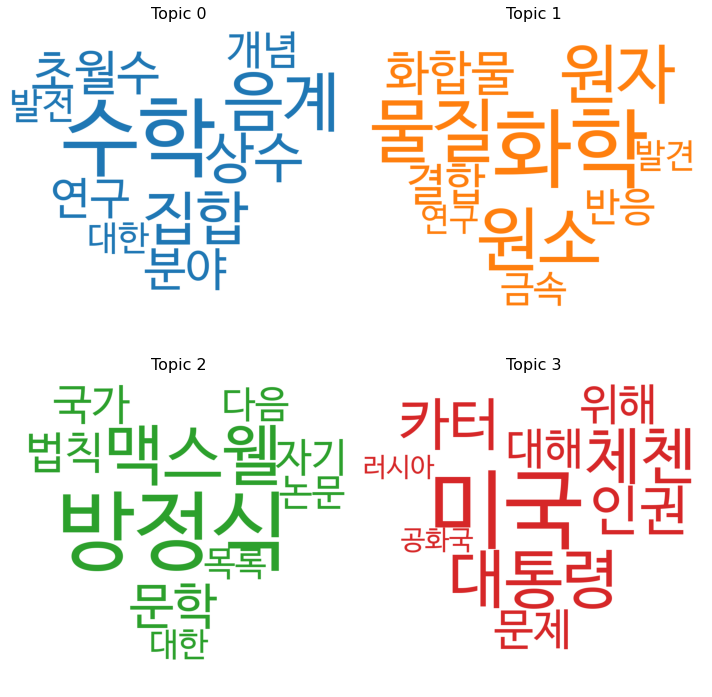

In [ ]:
# 토픽별 워드크라우딩
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
import numpy as np
from PIL import Image

# 이미지 마스킹 처리 위한 np.array로 변환
icon = Image.open('heart.png').convert("RGBA")
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
cloud = WordCloud(background_color='white',
                  font_path=fontpath,
                  width=2500,
                  height=1800,
                  mask=mask,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = ldamodel.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

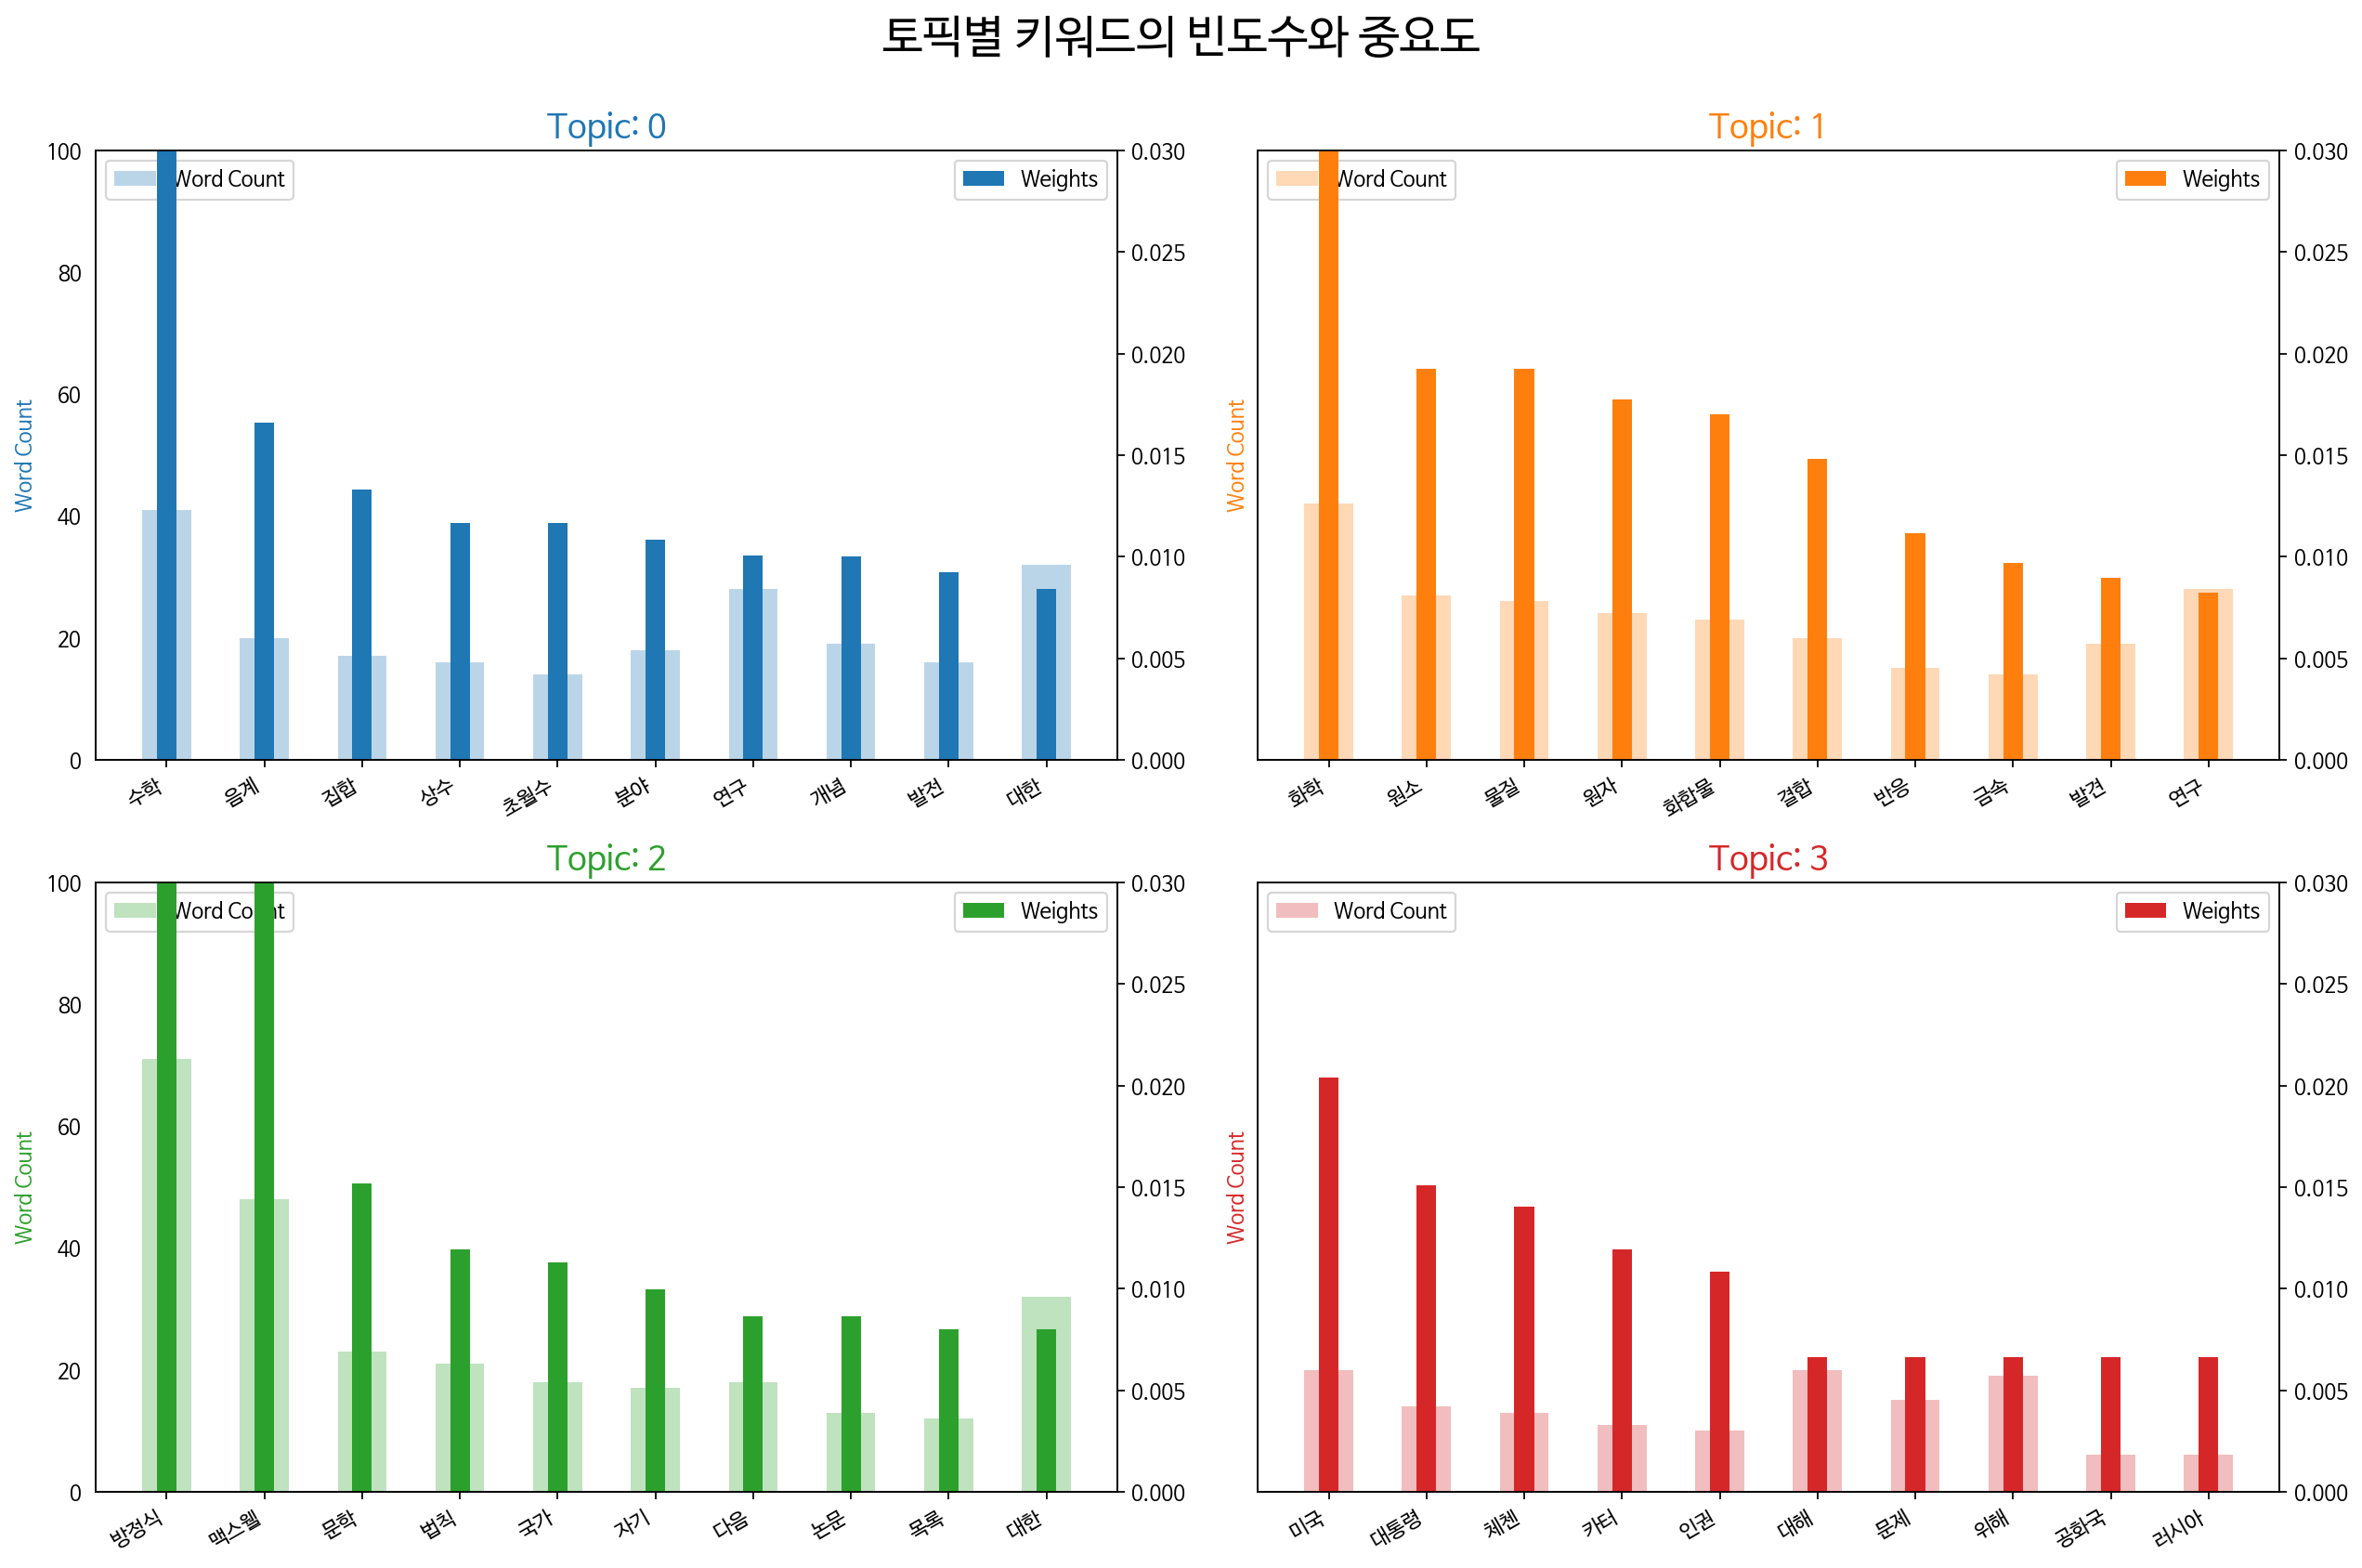

In [ ]:
# 토픽별 키워드의 빈도수와 중요도 시각화 
from collections import Counter
import matplotlib.font_manager as fm

topics = ldamodel.show_topics(formatted=False)
data_flat = [w for w_list in tokens for w in w_list]
counter = Counter(data_flat)

# 주제별 토픽
out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 

# 토픽별 키워드의 빈도수와 중요도
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 100)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('토픽별 키워드의 빈도수와 중요도', fontsize=22, y=1.05)    
plt.show()

In [ ]:
!pip install pyLDAvis==2.1.2

     |████████████████████████████████| 1.6 MB 28.5 MB/s 


In [ ]:
import pyLDAvis.gensim
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, g_corpus, g_dictionary)
vis

ModuleNotFoundError: ignored